In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#fileinput, max_rocks = "input_test.txt", 10
fileinput, max_rocks = "input_test.txt", 2022

#fileinput, max_rocks = "input.txt", 2022

In [3]:
with open (fileinput,'r') as f:
    input = f.read().strip('\n')

In [4]:
input

'>>><<><>><<<>><>>><<<>>><<<><<<>><>><<>>'

A tetris game where pieces fall from higher height indices to lower ones

Represent pieces by a numpy boolean

Represent game as boolean. Walls and fallen pieces as True, and empty space as False.

In [5]:
import numpy as np

In [6]:
piece0 = np.ones( (1,4), dtype=bool)

In [7]:
piece0

array([[ True,  True,  True,  True]])

In [8]:
piece1  = np.array( [
    [0,1,0],
    [1,1,1],
    [0,1,0]
    ],dtype=bool)

In [9]:
piece2 = np.array( [
    [0,0,1],
    [0,0,1],
    [1,1,1]
    ],dtype=bool)

piece3 = np.ones( (4,1),dtype=bool)
piece4 = np.ones( (2,2),dtype=bool)

In [10]:
#Implement a rotating list with collections dequeue
from collections import deque
pieces =  deque( [piece0, piece1, piece2, piece3, piece4] )

Create game region, with excessive height to take into account a large number of movements and pieces falling

In [11]:
game_height = 100
game = np.zeros((game_height,9), dtype=bool)

#walls
game[:,0]=True
game[:,8]=True

#Bottom
game[0,:]= True

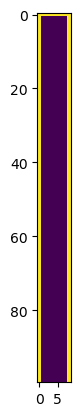

In [12]:
import matplotlib.pyplot as plt
plt.imshow(game)

Engine test

Determine 'top' of pile of rocks calculate location of new piece

In [13]:
#Exclude walls
game_mid = game[:,1:-1]
game_mid

array([[ True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False,

In [14]:
trans = np.logical_and( game_mid[:-1,:] , np.logical_not(game_mid[1:,:]) )

In [15]:
top_of_pile = np.max(np.nonzero(np.sum( trans) >0 )[0])+1
top_of_pile

1

OK

In [16]:
#Spawn new piece
piece_pos_y = top_of_pile+4
piece_pos_x = 3

In [17]:
curpiece = pieces[0]
pieces.rotate(-1)
print(curpiece)

[[ True  True  True  True]]


In [18]:
#Get piece + surrounding count to check if there will be overlap after movement
piece_and_surround0 = game[ piece_pos_y-1: piece_pos_y+curpiece.shape[0] , :].copy()
piece_and_surround0

array([[ True, False, False, False, False, False, False, False,  True],
       [ True, False, False, False, False, False, False, False,  True]])

In [19]:
piece_and_surround0[1:1+curpiece.shape[0],piece_pos_x:piece_pos_x+curpiece.shape[1]] = np.logical_or(piece_and_surround0[1:1+curpiece.shape[0],piece_pos_x:piece_pos_x+curpiece.shape[1]], curpiece)
piece_and_surround0

array([[ True, False, False, False, False, False, False, False,  True],
       [ True, False, False,  True,  True,  True,  True, False,  True]])

Consider creating a function that says whether a certain movement is allowed or not

Do a jet push

In [20]:
jet = input[0]
jet

'>'

In [21]:
piece_pos_x1 = 0
piece_pos_y1 = piece_pos_y
if jet=='>':
    piece_pos_x1 = piece_pos_x+1
elif jet=='<':
    piece_pos_x1 = piece_pos_x+1
else:
    print(f"Error, movement {jet} not supported")

Check movement is ok, otherwise discard

In [22]:
piece_and_surround1 = game[ piece_pos_y1-1: piece_pos_y1+curpiece.shape[0] , :].copy()
piece_and_surround1[1:1+curpiece.shape[0],piece_pos_x1:piece_pos_x1+curpiece.shape[1]] = np.logical_or(piece_and_surround1[1:1+curpiece.shape[0],piece_pos_x1:piece_pos_x1+curpiece.shape[1]], curpiece)
piece_and_surround1

array([[ True, False, False, False, False, False, False, False,  True],
       [ True, False, False, False,  True,  True,  True,  True,  True]])

In [23]:
np.sum(piece_and_surround1)

8

In [24]:
np.sum(piece_and_surround0)

8

In [25]:
if np.sum(piece_and_surround1) == np.sum(piece_and_surround0):
    #Proceed with the move
    piece_pos_x = piece_pos_x1
    piece_pos_y = piece_pos_y1
else:
    #Don't move and retain previous positions
    pass

In [26]:
MOVE_LEFT=1
MOVE_RIGHT=2
MOVE_DOWN=3

In [27]:
def isMoveAllowed(piece, xpos0, ypos0, move):
    
    xpos1 = xpos0
    if move==MOVE_LEFT:
        xpos1=xpos0-1
    elif move==MOVE_RIGHT:
        xpos1=xpos0+1
    
    iy=1
    if move==MOVE_DOWN:
        iy=0
    
    print(piece)
    _piece_and_surround0 = game[ ypos0-1: ypos0+piece.shape[0] , :].copy()
    _piece_and_surround0[1:1+piece.shape[0],xpos0:xpos0+piece.shape[1]] = np.logical_or(_piece_and_surround0[1:1+piece.shape[0],xpos0:xpos0+piece.shape[1]], piece)
    print(_piece_and_surround0)

    _piece_and_surround1 = game[ ypos0-1: ypos0+piece.shape[0] , :].copy()
    _piece_and_surround1[iy:iy+piece.shape[0],xpos1:xpos1+piece.shape[1]] = np.logical_or(_piece_and_surround1[iy:iy+piece.shape[0],xpos1:xpos1+piece.shape[1]], piece)
    
    print(_piece_and_surround1)
    if np.sum(_piece_and_surround1) == np.sum(_piece_and_surround0):
        return True

    return False


In [28]:
#Test
isMoveAllowed(pieces[1] , 2,3, MOVE_DOWN)

[[False False  True]
 [False False  True]
 [ True  True  True]]
[[ True False False False False False False False  True]
 [ True False False False  True False False False  True]
 [ True False False False  True False False False  True]
 [ True False  True  True  True False False False  True]]
[[ True False False False  True False False False  True]
 [ True False False False  True False False False  True]
 [ True False  True  True  True False False False  True]
 [ True False False False False False False False  True]]


True

OK

# Game Loop

In [5]:
def isMoveAllowed(piece, xpos0, ypos0, move):
    
    xpos1 = xpos0
    if move==MOVE_LEFT:
        xpos1=xpos0-1
    elif move==MOVE_RIGHT:
        xpos1=xpos0+1
    
    iy=1
    if move==MOVE_DOWN:
        iy=0
    
    #print(piece)
    _piece_and_surround0 = game[ ypos0-1: ypos0+piece.shape[0] , :].copy()
    _piece_and_surround0[1:1+piece.shape[0],xpos0:xpos0+piece.shape[1]] = np.logical_or(_piece_and_surround0[1:1+piece.shape[0],xpos0:xpos0+piece.shape[1]], piece)
    #print(_piece_and_surround0)

    _piece_and_surround1 = game[ ypos0-1: ypos0+piece.shape[0] , :].copy()
    _piece_and_surround1[iy:iy+piece.shape[0],xpos1:xpos1+piece.shape[1]] = np.logical_or(_piece_and_surround1[iy:iy+piece.shape[0],xpos1:xpos1+piece.shape[1]], piece)
    
    #print(_piece_and_surround1)
    if np.sum(_piece_and_surround1) == np.sum(_piece_and_surround0):
        return True

    return False

In [6]:
MOVE_LEFT=1
MOVE_RIGHT=2
MOVE_DOWN=3

In [7]:
def getTopOfGamePileIndex():
    game_mid = game[:,1:-1]
    trans = np.logical_and( game_mid[:-1,:] , np.logical_not(game_mid[1:,:]) )
    top_of_pile = np.max(np.nonzero(np.sum( trans,axis=1 ) >0 )[0])+1
    return top_of_pile


In [8]:
game_progress = []

# Start the game board
game_height = max_rocks*3
game = np.zeros((game_height,9), dtype=bool)

#walls
game[:,0]=True
game[:,8]=True

#Bottom
game[0,:]= True

game_progress.append(game.copy())

#pieces
piece0 = np.ones( (1,4), dtype=bool)
piece1  = np.array( [
    [0,1,0],
    [1,1,1],
    [0,1,0]
    ],dtype=bool)
piece2 = np.array( [
    [1,1,1],
    [0,0,1],
    [0,0,1]
    ],dtype=bool)
piece3 = np.ones( (4,1),dtype=bool)
piece4 = np.ones( (2,2),dtype=bool)

#Implement a rotating list with collections dequeue
from collections import deque
pieces =  deque( [piece0, piece1, piece2, piece3, piece4] )

curpiece = None

rock_count = 0

move_queue = deque(input)

while rock_count< max_rocks:

    input0 = move_queue[0]
    move_queue.rotate(-1)
    
    if curpiece is None:
        #Respawn a new piece

        #Get top of pile
        top_of_pile= getTopOfGamePileIndex()

        #Spawn new piece
        piece_pos_y = top_of_pile+3
        piece_pos_x = 3
        curpiece = pieces[0]
        pieces.rotate(-1)
        rock_count+=1
        print(f"{rock_count}: Top of pile {top_of_pile}, new piece, at {piece_pos_x},{piece_pos_y}")

    #Try a jet push sideways
    jetmove = MOVE_DOWN
    if input0=='>':
        jetmove=MOVE_RIGHT
    elif input0=='<':
        jetmove=MOVE_LEFT
    else:
        print(f"Error, movement {jet} not supported")
        continue

    #Check this side move is allowed
    if isMoveAllowed(curpiece, piece_pos_x, piece_pos_y,jetmove):
        #Make the move
        if jetmove==MOVE_RIGHT:
            print(f"{rock_count}: Move right")
            piece_pos_x+=1
        else:
            piece_pos_x-=1
            print(f"{rock_count}: Move left")
    
    #Move down
    if isMoveAllowed(curpiece, piece_pos_x, piece_pos_y,MOVE_DOWN):
        #Make the move
        piece_pos_y-=1
        print(f"{rock_count}: Move down")
    else:
        #Move is not allowed, piece goes to rest
        print("Down movement is not allowed, piece comes to rest")
        game[piece_pos_y:piece_pos_y+curpiece.shape[0], piece_pos_x:piece_pos_x+curpiece.shape[1] ] = np.logical_or(
            game[piece_pos_y:piece_pos_y+curpiece.shape[0], piece_pos_x:piece_pos_x+curpiece.shape[1] ] , curpiece
            )
        #rock_count+=1
        curpiece=None #force new piece to be spawned

        game_progress.append(game.copy())
    
print(f"Completed rocks {rock_count}")

1: Top of pile 1, new piece, at 3,4
1: Move right
1: Move down
1: Move down
1: Move down
1: Move left
Down movement is not allowed, piece comes to rest
2: Top of pile 2, new piece, at 3,5
2: Move left
2: Move down
2: Move right
2: Move down
2: Move left
2: Move down
2: Move right
Down movement is not allowed, piece comes to rest
3: Top of pile 5, new piece, at 3,8
3: Move right
3: Move down
3: Move left
3: Move down
3: Move left
3: Move down
3: Move left
3: Move down
Down movement is not allowed, piece comes to rest
4: Top of pile 7, new piece, at 3,10
4: Move right
4: Move down
4: Move left
4: Move down
4: Move right
4: Move down
4: Move right
4: Move down
4: Move right
4: Move down
4: Move left
4: Move down
Down movement is not allowed, piece comes to rest
5: Top of pile 8, new piece, at 3,11
5: Move left
5: Move down
5: Move right
5: Move down
5: Move right
5: Move down
5: Move right
Down movement is not allowed, piece comes to rest
6: Top of pile 10, new piece, at 3,13
6: Move left

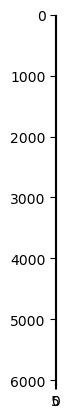

In [33]:
plt.imshow(game_progress[-1][::-1,:])

In [9]:
answer = getTopOfGamePileIndex()+2
answer

3068